<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/ANALISIS%20FLUIDOS%20GASEOSOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from operator import truediv
import numpy as np
import pandas as pd
url='https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend280922.csv'
datos = pd.read_csv(url,sep=";",decimal=",",index_col=0)
df=pd.DataFrame(datos)
n=160
#df.head()
#df.info()
# segmentan para la curva
for i in range(1,960):
  if i<=160:df1=df.iloc[:160]
  if (i>160 and i<=320):df2=df.iloc[160:320]
  if (i>320 and i<=480):df3=df.iloc[320:480]
  if (i>480 and i<=640):df4=df.iloc[480:640]
  if (i>640 and i<=800):df5=df.iloc[640:800]
  if (i>800 and i<=960):df6=df.iloc[800:960]





In [50]:
import matplotlib.pyplot as plt
def GRAFICAR_Q (T):
  fig, ax = plt.subplots(1, figsize=(60,15))
  fig.suptitle('CAUDAL DE ENTRADA SIDERCA',fontsize=30)
  q=T.FQI161
  x=T.Time
  ax.plot(x,q ,color="Blue",label="FQI_161 entrada")
  p,=ax.plot(x,q,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig.autofmt_xdate()
  plt.show()
def GRAFICAR_P(T):
  fig1, ax0 = plt.subplots(1, figsize=(60,15))
  fig1.suptitle('PRESION DE ENTRADA SIDERCA',fontsize=30)
  p=T.PIR161
  x=T.Time
  ax0.plot(x,p ,color="Blue",label="FQI_161 entrada")
  p,=ax0.plot(x,p,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig1.autofmt_xdate()
  plt.show()

# ***Trends de caudal y presión caudalimetro entrada.***

In [51]:
T=df4

In [ ]:
GRAFICAR_Q(T)

In [ ]:
GRAFICAR_P(T)

# ***Analisis de maximos y minimos***

In [ ]:
print(df.FQI161.describe(),df.PIR161.describe())


In [57]:
n_muestras=10
dfmax=df.nlargest(n_muestras,'PIR161')
#print(dfmax)
dfmin=df.nsmallest(n_muestras,'PIR161')
#print(dfmin)
dfa=(#df.loc[df.loc[:, 'PIR161'] <= 12.9]
     df.nlargest(n_muestras,'PIR161')
     
     
     )


#print(dfa)
print(dfa.nlargest(n_muestras,'PIR161'))

             Date      Time   FQI161  PIR161  FQI165  FQI169  FQI177  FQI173  \
indice                                                                         
208     28/9/2229   5:10:29  2243.18   15.60   88.00    0.00  260.67  133.67   
201     28/9/2222   4:59:59  2395.94   15.57   11.00    0.00  241.06  148.13   
202     28/9/2223   5:01:29  1419.13   15.57   22.00    0.00  190.06   79.50   
204     28/9/2225   5:04:29  1665.30   15.53   44.00    0.00  149.56  111.67   
206     28/9/2227   5:07:29  2720.19   15.52   66.00    0.00  292.47  203.63   
207     28/9/2228   5:08:59  1353.71   15.52   77.00    0.00  116.36   73.20   
203     28/9/2224   5:02:59  1524.71   15.47   33.00    0.00  148.41   69.44   
209     28/9/2230   5:11:59  1613.64   15.44    6.00  618.00   60.33   43.33   
20      28/9/2041   0:28:29  2634.22   15.43  515.19  855.29  136.07  117.78   
793     28/9/2814  19:47:59  2392.62   15.42  441.55  823.67  100.60   87.44   

         FQI151  
indice           
208

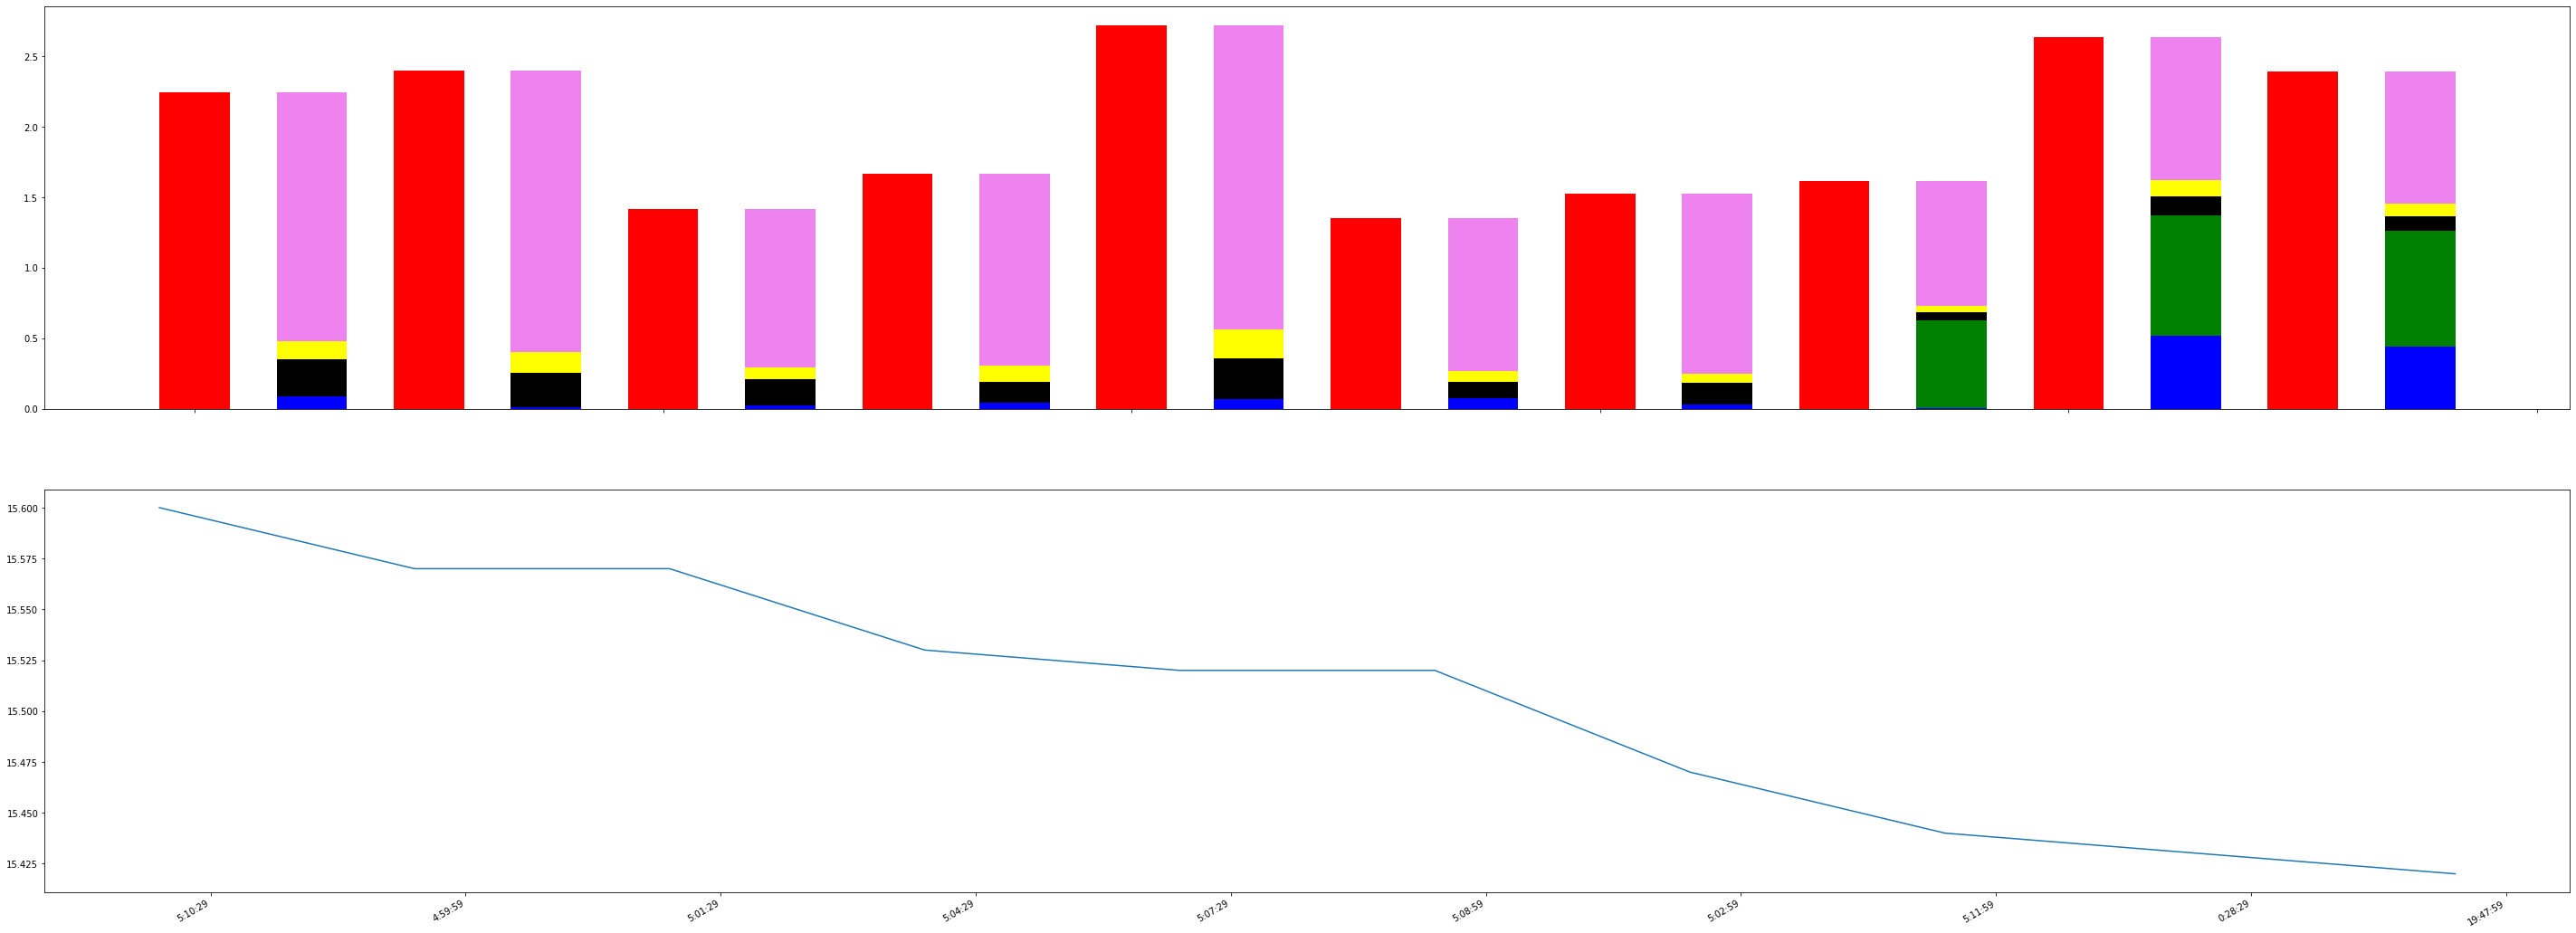

In [65]:


fig3, (ax,ax0) = plt.subplots(2,1, figsize=(50,20))
bar1=np.arange(len(dfa.Time))
bar2=[i+0.5 for i in bar1]

ax.bar(bar1,dfa.FQI161/1000,0.3,color="red")


ax.bar(bar2,dfa.FQI165/1000,0.3,color="blue")
ax.bar(bar2,dfa.FQI169/1000,0.3,bottom=dfa.FQI165/1000,color="green")
ax.bar(bar2,dfa.FQI177/1000,0.3,bottom=(dfa.FQI165+dfa.FQI169)/1000,color="black")
ax.bar(bar2,dfa.FQI173/1000,0.3,bottom=(dfa.FQI165+dfa.FQI169+dfa.FQI177)/1000,color="yellow")
ax.bar(bar2,dfa.FQI151/1000,0.3,bottom=(dfa.FQI165+dfa.FQI169+dfa.FQI177+dfa.FQI173)/1000,color="violet")
plt.xticks(bar1+0.4/2,dfa.Time)
ax0.plot(dfa.Time,dfa.PIR161)
fig3.autofmt_xdate()

plt.show()